In [5]:
!pip install seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv("titanic.csv")

In [7]:
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [8]:
print("Data Shape:",df.shape)
print("\nData types:\n",df.dtypes)
print("\nMissing values:",df.isnull().sum())

Data Shape: (887, 8)

Data types:
 Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

Missing values: Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64


In [9]:
print("\nSummary stats:\n",df.describe(include='all'))


Summary stats:
           Survived      Pclass                    Name   Sex         Age  \
count   887.000000  887.000000                     887   887  887.000000   
unique         NaN         NaN                     887     2         NaN   
top            NaN         NaN  Mr. Owen Harris Braund  male         NaN   
freq           NaN         NaN                       1   573         NaN   
mean      0.385569    2.305524                     NaN   NaN   29.471443   
std       0.487004    0.836662                     NaN   NaN   14.121908   
min       0.000000    1.000000                     NaN   NaN    0.420000   
25%       0.000000    2.000000                     NaN   NaN   20.250000   
50%       0.000000    3.000000                     NaN   NaN   28.000000   
75%       1.000000    3.000000                     NaN   NaN   38.000000   
max       1.000000    3.000000                     NaN   NaN   80.000000   

        Siblings/Spouses Aboard  Parents/Children Aboard       Fare  


In [13]:
df['Age'].fillna(df['Age'].median(),inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_7932\1527141296.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)


Text(0.5, 1.0, 'Fare by class')

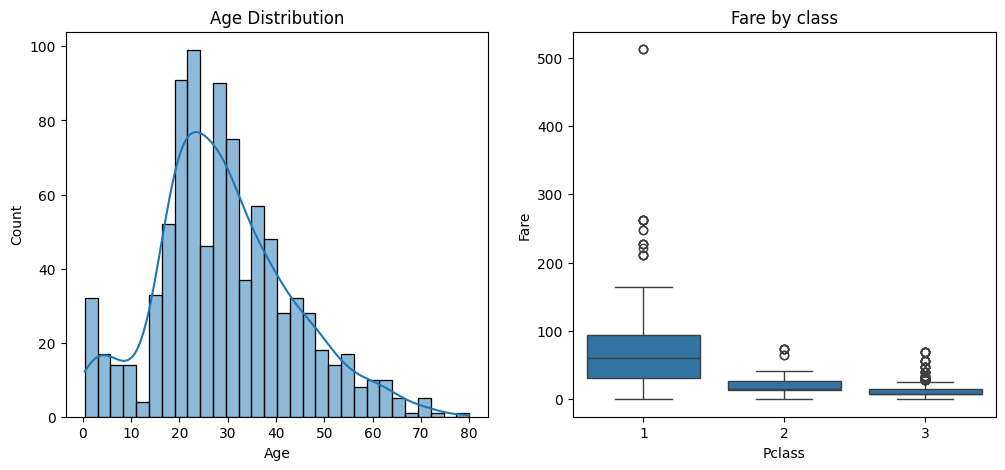

In [16]:
fig, ax=plt.subplots(1,2,figsize=(12,5))
sns.histplot(df['Age'],bins=30,kde=True,ax=ax[0]).set_title('Age Distribution')
sns.boxplot(x='Pclass',y='Fare',data=df,ax=ax[1]).set_title('Fare by class')

Text(0.5, 1.0, 'Survival by Gender')

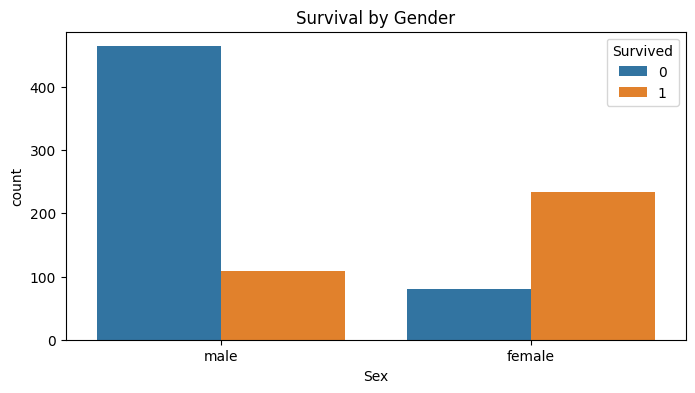

In [17]:
plt.figure(figsize=(8,4))
sns.countplot(x='Sex',hue='Survived',data=df).set_title('Survival by Gender')

<Axes: >

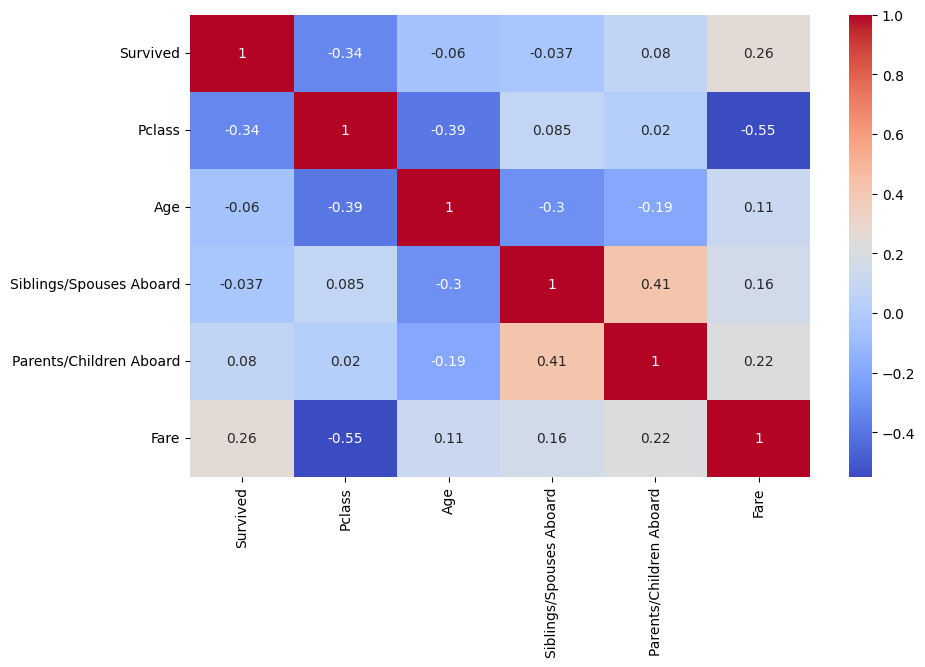

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')

In [19]:
pd.crosstab(df['Pclass'],df['Survived'],normalize='index')*100

Survived,0,1
Pclass,,
1,37.037037,62.962963
2,52.717391,47.282609
3,75.564682,24.435318


Text(0.5, 1.0, 'Fare Outliers')

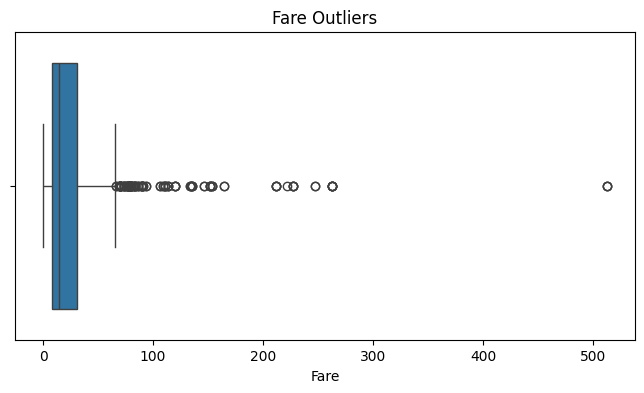

In [22]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Fare']).set_title('Fare Outliers')

In [23]:
from scipy import stats

In [26]:
z_scores=np.abs(stats.zscore(df['Fare']))
outliers=df[z_scores>3]
print(f"Found {len(outliers)} fare outliers")

Found 20 fare outliers


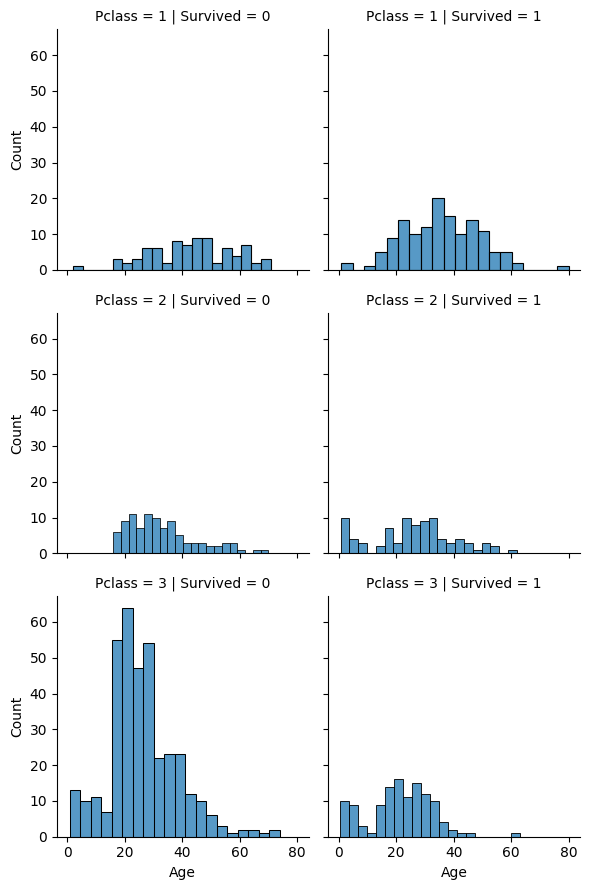

In [27]:
g=sns.FacetGrid(df,col='Survived',row='Pclass',height=3)
g.map(sns.histplot,'Age',bins=20)

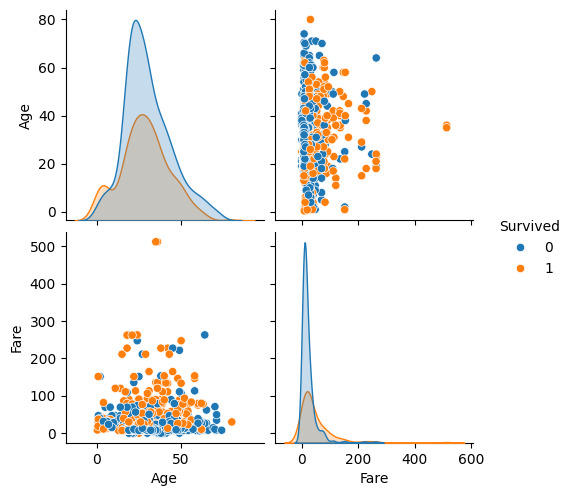

In [29]:
sns.pairplot(df[['Age','Fare','Survived']],hue='Survived')